<a href="https://colab.research.google.com/github/sk2003hw/Customer-Churn-Prediction/blob/main/F20EC_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd # to read the file
import matplotlib.pyplot as plt # to plot the graphs
import seaborn as sns # to aid in plotting graphs
from sklearn.model_selection import train_test_split # for creating a train and test dataset
from sklearn.tree import DecisionTreeClassifier # to run a Decision Tree
from sklearn.metrics import accuracy_score, classification_report # for computing and displaying the metrics
from sklearn import tree # for visualizing the decision tree
from sklearn.model_selection import GridSearchCV # for running Grid Search

## Data Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newec-1000.csv') # opening the CSV file with the data as a dataframe
df.head() # to view the first 5 records of data

,customer_id,last_name,email,account_creation_before,total_orders_made,total_amount_spent,last_purchase_before,likeliness_to_recommend,time_spent_last,product_quality,delivery_experience,price_aptness,website_design,customer_service,churn
0,26dc9684-c3aa-4033-a2f0-6197c2f60535,Hancorn,shancorn0@irs.gov,42,18,832,75,5,87,3,5,3,4,3,0
1,1f78b20d-dbbc-43f8-8dde-5d6928620a07,MacConchie,amacconchie1@studiopress.com,7,20,109,73,5,57,5,2,1,3,2,0
2,f76e3657-2ff7-4312-90d2-2307d6d63db2,Still,fstill2@icq.com,54,1,1000,12,5,65,4,5,1,5,1,0
3,30564789-a56b-4d0f-8653-8e0185fcd77d,Mc Cahey,bmccahey3@gov.uk,33,8,372,94,4,10,1,2,2,2,2,0
4,634592b1-6419-4d69-83a1-7b5944962da9,Inwood,linwood4@biblegateway.com,61,12,456,79,1,83,1,2,4,2,2,1


In [ ]:
df.shape # to view the dimensions of he the dataframe created- it has 1000 records (rows) and 15 attributes (columns)

(1000, 15)

In [ ]:
df.info() # to view the number of null values and the type of the columns; all numbers were read as integers but they are supposed to be likert scale ratings (objects)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              1000 non-null   object
 1   last_name                1000 non-null   object
 2   email                    1000 non-null   object
 3   account_creation_before  1000 non-null   int64 
 4   total_orders_made        1000 non-null   int64 
 5   total_amount_spent       1000 non-null   int64 
 6   last_purchase_before     1000 non-null   int64 
 7   likeliness_to_recommend  1000 non-null   int64 
 8   time_spent_last          1000 non-null   int64 
 9   product_quality          1000 non-null   int64 
 10  delivery_experience      1000 non-null   int64 
 11  price_aptness            1000 non-null   int64 
 12  website_design           1000 non-null   int64 
 13  customer_service         1000 non-null   int64 
 14  churn                    1000 non-null   

In [ ]:
df.isnull().sum() # to ensure there are no Null values by summing up the count of them for all attributes

customer_id                0
last_name                  0
email                      0
account_creation_before    0
total_orders_made          0
total_amount_spent         0
last_purchase_before       0
likeliness_to_recommend    0
time_spent_last            0
product_quality            0
delivery_experience        0
price_aptness              0
website_design             0
customer_service           0
churn                      0
dtype: int64

In [ ]:
df[df.duplicated()] # to view any duplicate records

,customer_id,last_name,email,account_creation_before,total_orders_made,total_amount_spent,last_purchase_before,likeliness_to_recommend,time_spent_last,product_quality,delivery_experience,price_aptness,website_design,customer_service,churn


In [ ]:
df.drop(['customer_id','last_name','email'], axis=1, inplace=True) # to drop these columns from the dataframe as they are not necessary for this project

In [ ]:
df.head() # to view the data after all changes made

,account_creation_before,total_orders_made,total_amount_spent,last_purchase_before,likeliness_to_recommend,time_spent_last,product_quality,delivery_experience,price_aptness,website_design,customer_service,churn
0,42,18,832,75,5,87,3,5,3,4,3,0
1,7,20,109,73,5,57,5,2,1,3,2,0
2,54,1,1000,12,5,65,4,5,1,5,1,0
3,33,8,372,94,4,10,1,2,2,2,2,0
4,61,12,456,79,1,83,1,2,4,2,2,1


In [ ]:
# To change the type of the columns to 'object' (string) as they're likert data
col_types = {'likeliness_to_recommend': object,
             'product_quality': object,
             'delivery_experience': object,
             'price_aptness': object,
             'website_design': object,
             'customer_service': object
            }

df = df.astype(col_types) # to change the types from the dictionary created above

In [ ]:
df.info() # viewing column types after changing them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   account_creation_before  1000 non-null   int64 
 1   total_orders_made        1000 non-null   int64 
 2   total_amount_spent       1000 non-null   int64 
 3   last_purchase_before     1000 non-null   int64 
 4   likeliness_to_recommend  1000 non-null   object
 5   time_spent_last          1000 non-null   int64 
 6   product_quality          1000 non-null   object
 7   delivery_experience      1000 non-null   object
 8   price_aptness            1000 non-null   object
 9   website_design           1000 non-null   object
 10  customer_service         1000 non-null   object
 11  churn                    1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
df.describe() # to view descriptive statistics for the numerical data
# Accounts were created averagely at least 49 days before analysis and purchases were made averagely 49 days back (latest purchases were of the same day).
# An average of more than 10 orders were made by each customer totally adding up to be a worth of a little over 512 AED.
# Similarly, an average of 50 minutes were spent on the website by each of them (which is a good value).

,account_creation_before,total_orders_made,total_amount_spent,last_purchase_before,time_spent_last,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.802000,10.728000,512.477000,49.201000,49.182000,0.478000
std,28.986324,5.805146,295.670486,29.244963,28.780013,0.499766
min,0.000000,1.000000,5.000000,0.000000,1.000000,0.000000
25%,26.750000,6.000000,243.750000,24.000000,24.000000,0.000000
50%,50.000000,11.000000,535.500000,49.000000,49.000000,0.000000
75%,74.250000,16.000000,768.000000,74.000000,74.250000,1.000000
max,100.000000,20.000000,1000.000000,100.000000,100.000000,1.000000


In [ ]:
categorical_columns = list(df.select_dtypes(include='object').columns) # columns with categorical data (likert scale data that will be used for analysis)
numerical_columns = list(df.select_dtypes(exclude='object').columns) # columns with numerical data or statistics of the customers' usage
print(categorical_columns)
print(numerical_columns)

['likeliness_to_recommend', 'product_quality', 'delivery_experience', 'price_aptness', 'website_design', 'customer_service']
['account_creation_before', 'total_orders_made', 'total_amount_spent', 'last_purchase_before', 'time_spent_last', 'churn']


In [ ]:
for column in categorical_columns: # number of instances associated with each of the number values are displayed
    print(df[column].value_counts(),'\n')

print(df['churn'].value_counts(),'\n')

5    220
4    210
1    207
2    191
3    172
Name: likeliness_to_recommend, dtype: int64 

1    233
4    214
5    185
2    185
3    183
Name: product_quality, dtype: int64 

3    212
4    206
5    203
2    193
1    186
Name: delivery_experience, dtype: int64 

4    214
1    208
3    198
5    196
2    184
Name: price_aptness, dtype: int64 

5    222
2    214
4    199
3    186
1    179
Name: website_design, dtype: int64 

2    212
5    201
3    199
4    198
1    190
Name: customer_service, dtype: int64 

0    522
1    478
Name: churn, dtype: int64 



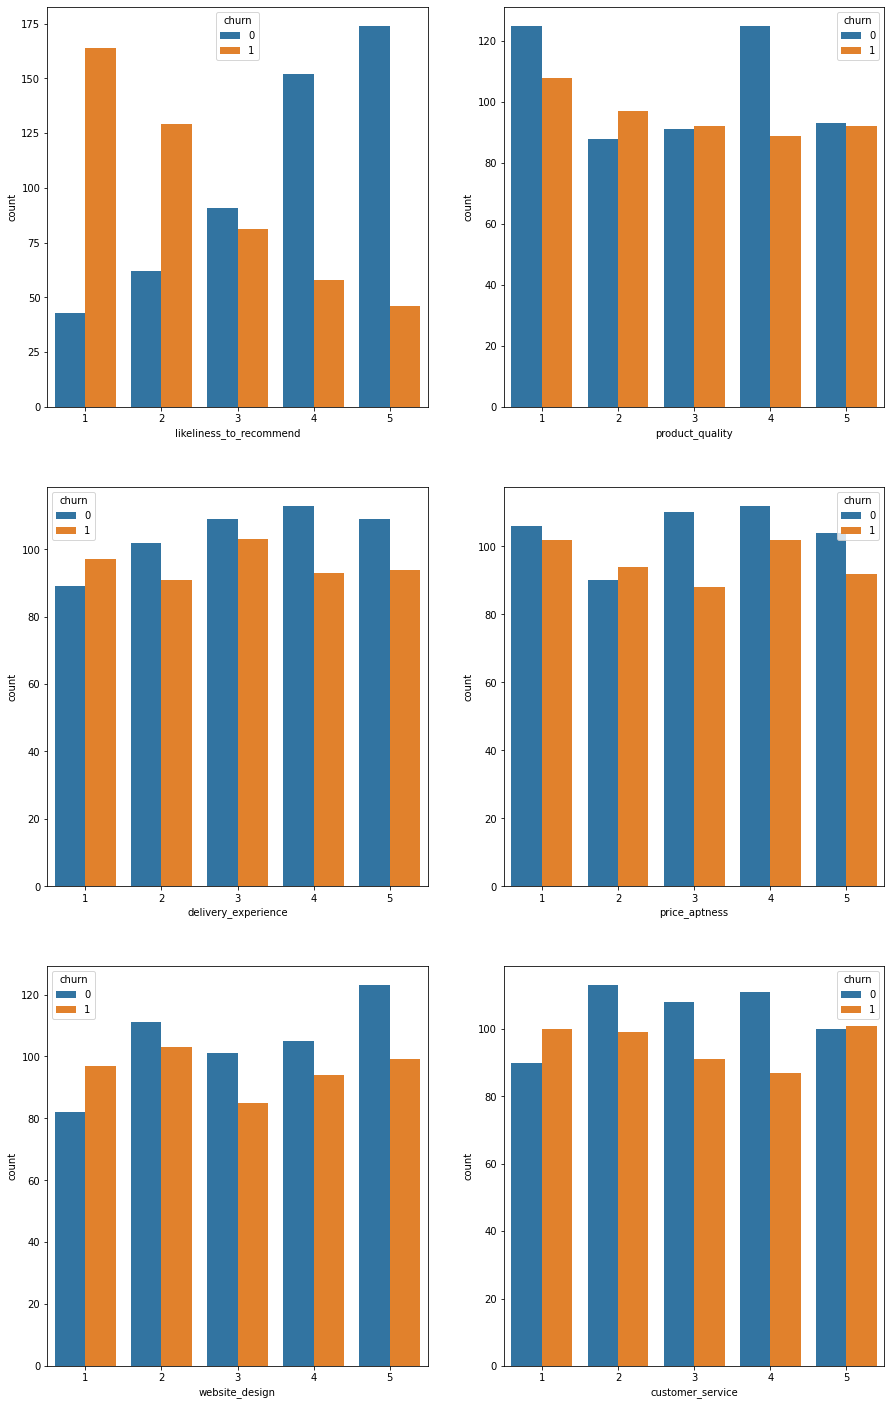

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,25)) # the plots are shown as sub-plots in 3 rows and 2 columns
for col, subplot in zip(categorical_columns, ax.flatten()): # for each categorical column and graphs, a barchart is made for each of the values and the two colored bars are for churn and not churn values
  sns.countplot(x = df[col], hue=df.churn, ax=subplot)

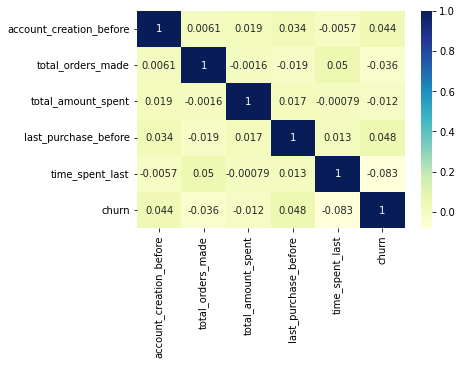

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) # the columns and the correlation coefficient between them are plotted and it can be inferred that none of them are strongly correlated (>0.5 or 0.7)
plt.show()

## Decision Tree Implementation

In [ ]:
X = df.iloc[:, 4:11] # only categorical values related to the questions in the form are considered for the input variables
y = df['churn'] # target variable is the churn attribute

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # creating the train and test sets

In [ ]:
X_train.shape # there are 750 instances and 7 attributes in this set and the test set thus has 250 instances

(750, 7)

In [ ]:
y_train.shape # there are 750 instances but only 1 column (churn column)

In [ ]:
X_train.head() # viewing a few instances of the dataframe

,likeliness_to_recommend,time_spent_last,product_quality,delivery_experience,price_aptness,website_design,customer_service
522,5,39,3,3,1,3,4
628,3,79,1,5,3,4,1
704,2,97,2,1,4,2,3
359,1,42,2,4,5,5,5
232,5,57,2,3,3,2,3


In [ ]:
y_train.head()

522    0
628    0
704    0
359    1
232    1
Name: churn, dtype: int64

In [ ]:
# Decision Tree for Classification (churn or not) is created
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, max_depth=3, splitter='random')
model.fit(X_train, y_train) # training the model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, splitter='random')

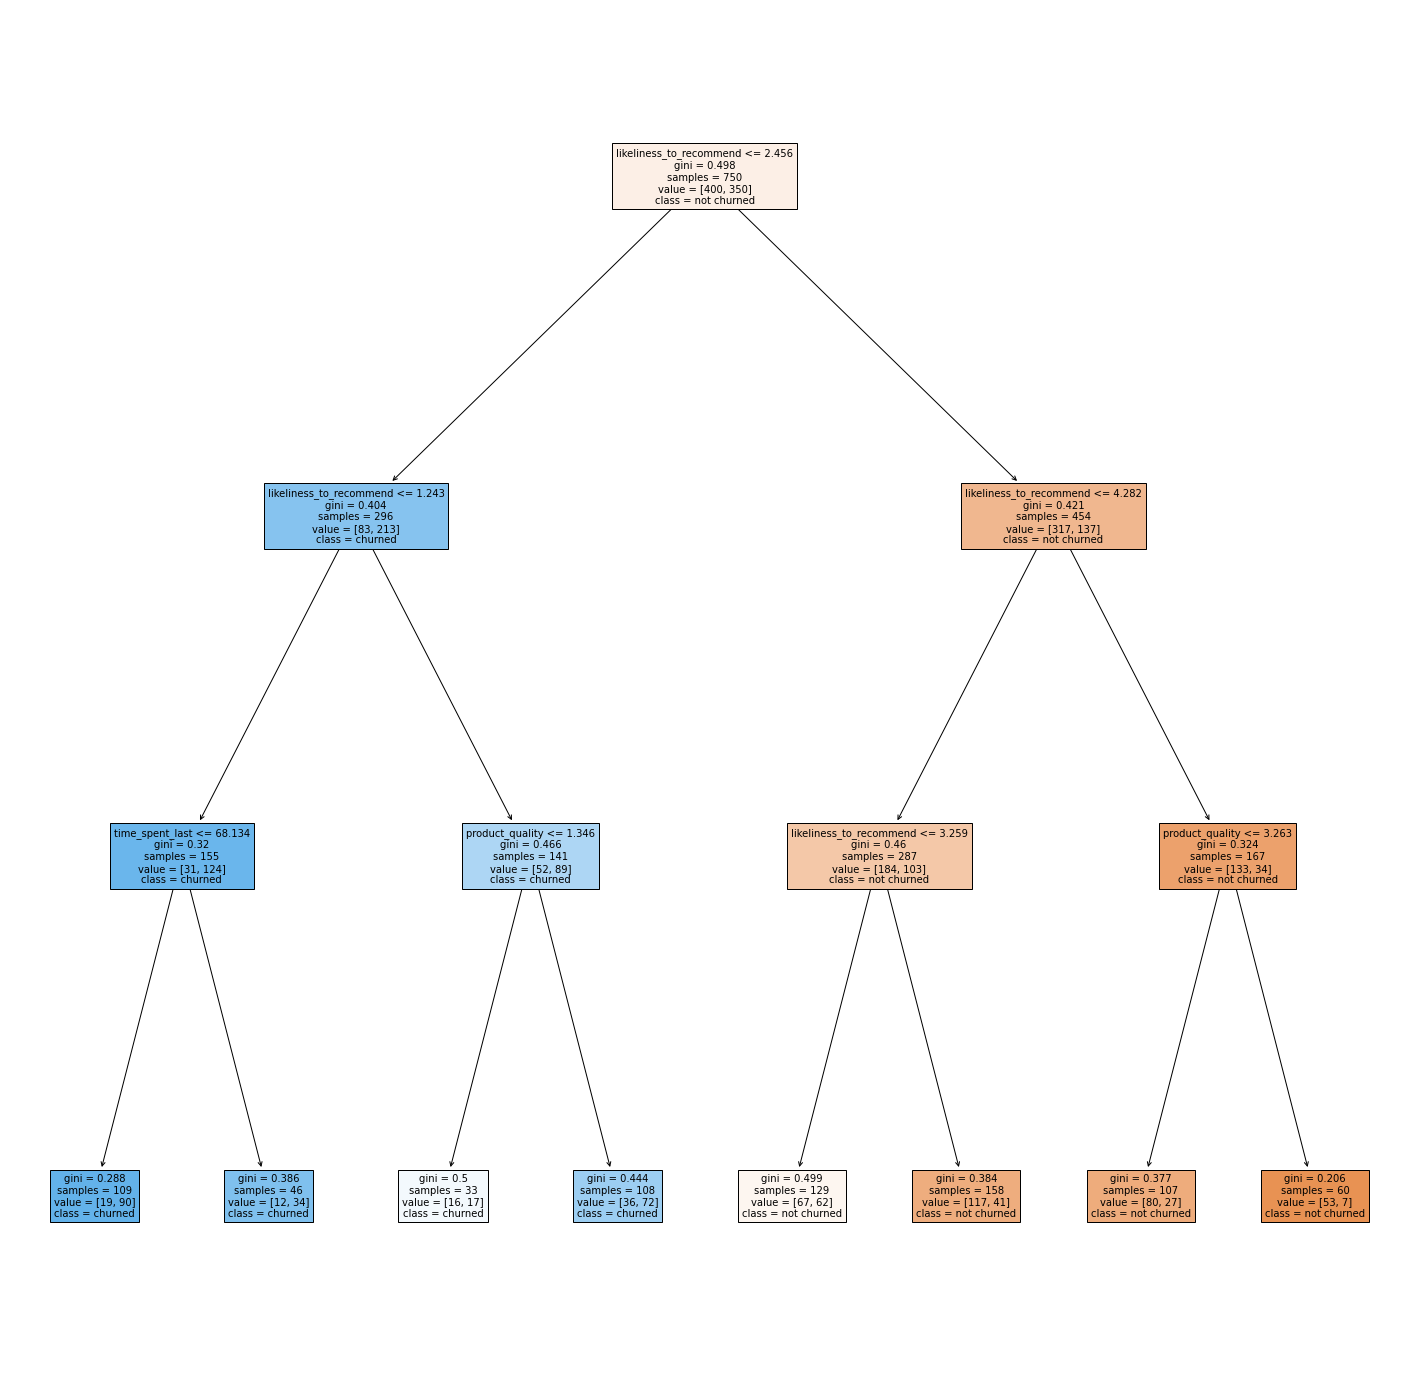

In [ ]:
plt.figure(figsize=(25,25))
# plotting the decision tree with the column and class names listed
tree.plot_tree(model, feature_names=X_train.columns, class_names=["not churned","churned"], filled=True, fontsize = 10)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train) # testing the model on the train set

In [ ]:
# to print the training accuracy, precision, recall, and F1 score (along with support)
print("Accuracy:", accuracy_score(y_train,y_train_pred))
print(classification_report(y_train, y_train_pred))

Accuracy: 0.7066666666666667
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       400
           1       0.72      0.61      0.66       350

    accuracy                           0.71       750
   macro avg       0.71      0.70      0.70       750
weighted avg       0.71      0.71      0.70       750



In [ ]:
y_test_pred = model.predict(X_test) # testing the on test set

In [ ]:
# to print the testing accuracy, precision, recall, and F1 score (along with support)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       122
           1       0.78      0.62      0.70       128

    accuracy                           0.72       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.73      0.72      0.72       250



In [ ]:
# To run Grid search for getting optimumm values for the hyperparamters involved in creating a decision tree for our data
# defining the search space
params =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15]
}

# defining search model
search = GridSearchCV(model, params, scoring='accuracy', cv=10, verbose = 3)
# running the search by training the model each time
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Streaming output truncated to the last 5000 lines.
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.693 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.720 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.680 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.640 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.693 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.627 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best;, score=0.680 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=1, split